<a href="https://colab.research.google.com/github/vikasnain6353/ai-ml-intern/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy with Scaling:", accuracy_score(y_test, y_pred))


Accuracy with Scaling: 0.9555555555555556


In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X, y)

print("Best K:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best K: {'n_neighbors': 6}
Best Score: 0.9800000000000001


In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    scores.append(score.mean())

for k, s in zip(k_range, scores):
    print(f'k = {k}, Accuracy = {s:.3f}')


k = 1, Accuracy = 0.960
k = 2, Accuracy = 0.953
k = 3, Accuracy = 0.967
k = 4, Accuracy = 0.967
k = 5, Accuracy = 0.967
k = 6, Accuracy = 0.967
k = 7, Accuracy = 0.967
k = 8, Accuracy = 0.967
k = 9, Accuracy = 0.973
k = 10, Accuracy = 0.967
k = 11, Accuracy = 0.967
k = 12, Accuracy = 0.973
k = 13, Accuracy = 0.980
k = 14, Accuracy = 0.973
k = 15, Accuracy = 0.973
k = 16, Accuracy = 0.973
k = 17, Accuracy = 0.973
k = 18, Accuracy = 0.980
k = 19, Accuracy = 0.973
k = 20, Accuracy = 0.980


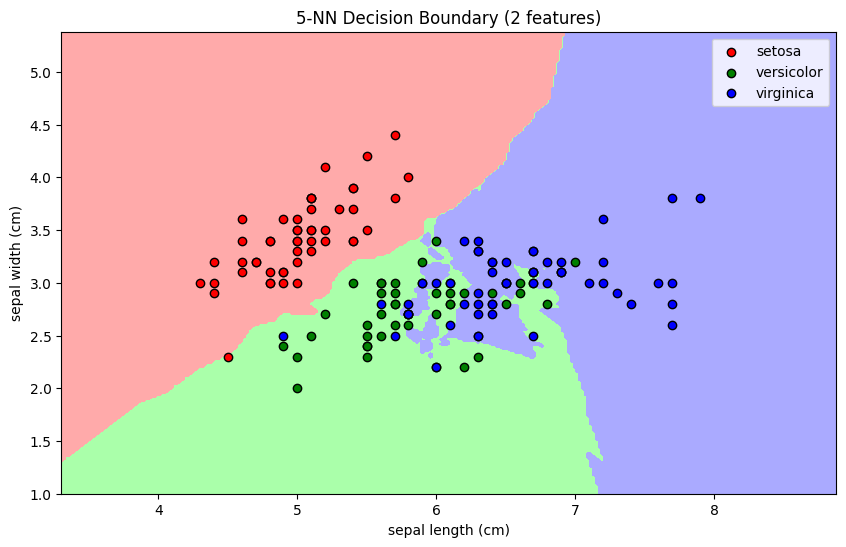

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
X_vis = X[:, :2]
y_vis = y

h = 0.02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_vis, y_vis)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

for idx, color in enumerate(cmap_bold):
    plt.scatter(X_vis[y_vis == idx, 0], X_vis[y_vis == idx, 1],
                c=color, label=iris.target_names[idx], edgecolor='k')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("5-NN Decision Boundary (2 features)")
plt.legend()
plt.show()
